### **1. Data Understanding**
Мета: Розібратися з даними та зрозуміти структуру та зміст колонок.
- Завантаження датасету.
- Виведення загальної інформації:
  - Кількість рядків і колонок.
  - Типи даних у колонках.
  - Кількість пропусків.
- Аналіз категоріальних змінних:
  - Визначення категоріальних змінних, включно з числовими, які мають ≤ 30 унікальних значень.
  - Виявлення колонок з **високою кардинальністю** (> 100 унікальних значень).
- Аналіз цільової змінної `target`:
  - Розподіл значень та оцінка балансу категорій.

---

# Загальна інформація про датасет
Кількість рядків: 21000
Кількість колонок: 116

Типи даних у колонках:
[dtype('int64') dtype('float64') dtype('O')]

Кількість пропущених значень у кожній колонці:
0

Унікальні значення для категоріальних змінних (включаючи вибрані числові):
Oblast_post_HOME: 29 унікальних значень
Raion_post_HOME: 495 унікальних значень
City_post_HOME: 1659 унікальних значень
Oblast_post_WORK: 29 унікальних значень
Raion_post_WORK: 493 унікальних значень
City_post_WORK: 1610 унікальних значень
device_brand: 182 унікальних значень
device_model: 2114 унікальних значень
software_os_vendor: 15 унікальних значень
software_os_name: 28 унікальних значень
software_os_version: 64 унікальних значень
device_type_rus: 3 унікальних значень
SCORING: 6 унікальних значень
user_hash: 21000 унікальних значень
CALCULATION_METHOD_ID: 2 унікальних значень
sim_count: 5 унікальних значень
ROUM: 2 унікальних значень
phone_value: 5 унікальних значень
car: 2 унікальних значень
gender: 2 унікаль

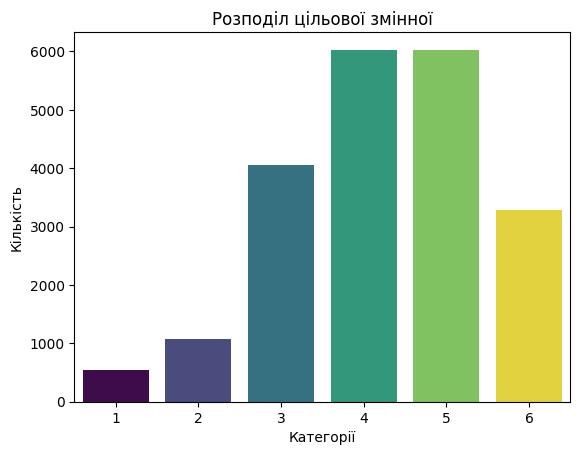


Баланс цільової змінної:
target
5    0.287095
4    0.286667
3    0.192714
6    0.156190
2    0.051238
1    0.026095
Name: proportion, dtype: float64


In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних
# Перевірка наявності файлу
file_path = './data/vodafone_age_subset.csv'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset not found at {file_path}")

# Завантаження датасету
dataset = pd.read_csv(file_path)

# Загальна інформація
print("# Загальна інформація про датасет")
print(f"Кількість рядків: {dataset.shape[0]}")
print(f"Кількість колонок: {dataset.shape[1]}")
print("\nТипи даних у колонках:")
print(dataset.dtypes.unique())

# Кількість пропусків у кожній колонці
missing_values = dataset.isnull().sum()
print("\nКількість пропущених значень у кожній колонці:")
print(missing_values[missing_values > 0].count())

# Унікальні значення для категоріальних змінних (включаючи вибрані числові змінні)
categorical_columns = list(dataset.select_dtypes(include=['object', 'category']).columns)
selected_numerical_as_categorical = [
    'CALCULATION_METHOD_ID',
    'sim_count',
    'ROUM',
    'phone_value',
    'car',
    'gender',
    'ecommerce_score'
]
all_categorical_columns = categorical_columns + selected_numerical_as_categorical

print("\nУнікальні значення для категоріальних змінних (включаючи вибрані числові):")
for col in all_categorical_columns:
    if col in dataset.columns:
        print(f"{col}: {dataset[col].nunique()} унікальних значень")

# Виявлення колонок з високою кардинальністю серед категоріальних змінних
high_cardinality_threshold = 100
high_cardinality_columns = [
    col for col in all_categorical_columns if dataset[col].nunique() > high_cardinality_threshold
]

print("\nКатегоріальні колонки з високою кардинальністю (> 100 унікальних значень):")
for col in high_cardinality_columns:
    print(f"{col}: {dataset[col].nunique()} унікальних значень")

# Аналіз цільової змінної 'target'
print("\nАналіз цільової змінної 'target':")
print(dataset['target'].value_counts())
print("\nРозподіл значень 'target':")
sns.countplot(x='target', data=dataset, palette='viridis', hue='target', dodge=False, legend=False)
plt.title("Розподіл цільової змінної")
plt.xlabel("Категорії")
plt.ylabel("Кількість")
plt.show()

print("\nБаланс цільової змінної:")
total = dataset['target'].value_counts(normalize=True)
print(total)


## Висновки по аналізу даних

### Загальна інформація
- **Кількість рядків**: 21 000  
- **Кількість колонок**: 116  
- **Пропущені значення**: Відсутні у всіх колонках.  

---

### Категоріальні змінні
Визначено категоріальні змінні, включно з числовими, які мають логічний зміст як категорії. Деякі змінні мають високу кардинальність (>100 унікальних значень), що потребує додаткової обробки.

---

### Колонки з **високою кардинальністю** (>100 унікальних значень):
Ці змінні можуть бути складними для обробки в моделі через велику кількість унікальних значень:
- `Raion_post_HOME`: 495  
- `City_post_HOME`: 1659  
- `Raion_post_WORK`: 493  
- `City_post_WORK`: 1610  
- `device_brand`: 182  
- `device_model`: 2114  
- `user_hash`: 21 000  

**Коментар**:  
- `user_hash` має надмірно високу кардинальність і, ймовірно, є унікальним ідентифікатором, що не несе інформативності для моделі.

---

### Аналіз цільової змінної `target`
- **Розподіл категорій**: Дані є **несбалансованими**.
  - Найбільше значень у категоріях **4** та **5** (близько 60% сукупно).
  - Найменша кількість у категоріях **1** та **2**.
  

---

### Висновки
1. Дані повні, пропуски відсутні.
2. Деякі категоріальні змінні мають **високу кардинальність** (наприклад, `device_model`, `user_hash`), що потребує додаткової обробки.
3. Цільова змінна `target` є **несбалансованою**, що слід врахувати при побудові моделей.
4. Подальші кроки:
   - Обробка високої кардинальності (агрегація або кодування).
   - Балансування цільової змінної для покращення якості моделі.

### **2. Data Cleaning**
Мета: Підготувати дані для подальшого аналізу та моделювання.
- **Обробка пропусків**:
  - Перевірка наявності пропущених значень.
- **Видалення непотрібних колонок**:
  - Колонки з **високою кардинальністю** (крім важливих для моделі).
  - Постійні колонки (лише одне унікальне значення).
- **Обробка некоректних значень**:
  - Пошук та виправлення аномальних значень у ключових фічах.

---

In [25]:
# Data Cleaning

# 1. Видалення колонок з високою кардинальністю
print("Видалення колонок з високою кардинальністю (> 100 унікальних значень):")
for col in high_cardinality_columns:
    print(f"Видалено: {col}")
    dataset.drop(columns=col, inplace=True)

# 2. Перевірка та видалення постійних колонок (1 унікальне значення)
constant_columns = [col for col in dataset.columns if dataset[col].nunique() == 1]
print("\nПостійні колонки (1 унікальне значення):")
if constant_columns:
    print(constant_columns)
    dataset.drop(columns=constant_columns, inplace=True)
else:
    print("Постійні колонки відсутні.")

# 3. Пошук потенційно некоректних значень
print("\nПошук потенційно некоректних значень:")

# Перевірка числових колонок на наявність аномалій (наприклад, значень < 0)
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    if (dataset[col] < 0).any():
        print(f"Некоректні значення знайдено у колонці: {col}")
        dataset[col] = dataset[col].clip(lower=0)  # Замінити значення < 0 на 0

# Перевірка категоріальних колонок на наявність некоректних значень
print("\nПеревірка категоріальних колонок на некоректні значення:")
for col in all_categorical_columns:
    if col in dataset.columns:
        invalid_values = dataset[col][~dataset[col].isin(dataset[col].unique())]
        if not invalid_values.empty:
            print(f"Некоректні значення у колонці {col}: {invalid_values.unique()}")

# 4. Підсумок очищення
print("\nРозмір датасету після очищення:")
print(f"Кількість рядків: {dataset.shape[0]}")
print(f"Кількість колонок: {dataset.shape[1]}")


Видалення колонок з високою кардинальністю (> 100 унікальних значень):
Видалено: Raion_post_HOME
Видалено: City_post_HOME
Видалено: Raion_post_WORK
Видалено: City_post_WORK
Видалено: device_brand
Видалено: device_model
Видалено: user_hash

Постійні колонки (1 унікальне значення):
['SBERBANK']

Пошук потенційно некоректних значень:
Некоректні значення знайдено у колонці: lifetime

Перевірка категоріальних колонок на некоректні значення:

Розмір датасету після очищення:
Кількість рядків: 21000
Кількість колонок: 108


## Висновки по Data Cleaning

### Видалення колонок з високою кардинальністю
- Видалено колонки з кількістю унікальних значень > 100:
  - `Raion_post_HOME`
  - `City_post_HOME`
  - `Raion_post_WORK`
  - `City_post_WORK`
  - `device_brand`
  - `device_model`
  - `user_hash`  
> **Причина**: Висока кардинальність ускладнює обробку та може призвести до погіршення якості моделі.

---

### Видалення постійних колонок
- Видалено колонку `SBERBANK`, оскільки вона містила лише **одне унікальне значення**.  
> **Причина**: Постійні колонки не несуть корисної інформації для моделі.

---

### Обробка некоректних значень
- У колонці **`lifetime`** виявлено **некоректні значення** (менше 0).  
  - Значення менше 0 було замінено на 0.  
> **Причина**: Від'ємні значення для "строку життя абонента" є аномальними.

---

### Підсумок очищення даних
- **Кількість рядків**: 21 000  
- **Кількість колонок**: 108  
- **Видалено**: 7 колонок з високою кардинальністю та 1 постійну колонку.  
- **Некоректні значення**: Оброблено в числовій колонці `lifetime`.

---

### **3. Exploratory Data Analysis (EDA)**
Мета: Зрозуміти розподіли та взаємозв'язки у даних.
- **Статистичний аналіз числових змінних**:
  - **Описова статистика** (`describe`): середнє, медіана, min, max, std.
  - Візуалізація ключових фіч: **гістограми** для `lifetime`, `how_long_same_model`, `phone_value`, `sim_count`.
- **Аналіз категоріальних змінних**:
  - Бар-чарти для основних категоріальних колонок.
- **Кореляційний аналіз**:
  - **Теплова карта** для ключових числових ознак.
  - Виявлення сильно корельованих ознак.
- **Залежність `target` від ключових числових фіч**:
  - **Boxplot** для `lifetime`, `how_long_same_model`, `phone_value`, `sim_count`.
- **Парні графіки** для основних фіч:
  - `sns.pairplot` для аналізу взаємозв'язків між фічами.

---

### Описова статистика числових змінних:
                               count        mean         std  min        25%         50%         75%          max
CALCULATION_METHOD_ID        21000.0    1.504190    0.499994  1.0   1.000000    2.000000    2.000000     2.000000
calls_count_in_weekdays      21000.0    5.024132    9.872541  0.0   1.220000    3.350000    6.700000   742.610000
calls_duration_in_weekdays   21000.0   11.166896   13.998677  0.0   2.411000    7.485500   15.795250   818.359000
calls_count_out_weekdays     21000.0    5.250357   11.382722  0.0   1.000000    3.260000    6.870000   680.090000
calls_duration_out_weekdays  21000.0   12.010912   15.876250  0.0   2.021000    7.422000   16.772000   770.013000
calls_count_in_weekends      21000.0    3.154089   10.215863  0.0   0.630000    2.000000    4.130000   938.630000
calls_duration_in_weekends   21000.0    7.902830   12.926433  0.0   1.074500    4.340000   10.456000   785.744000
calls_count_out_weekends     21000.0    3.36717

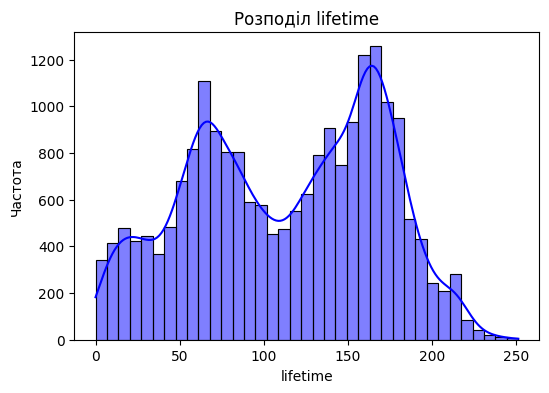

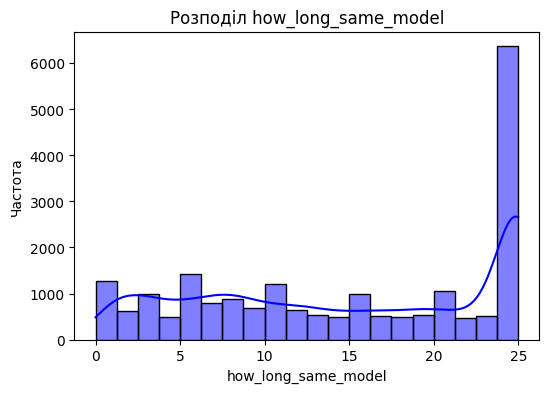

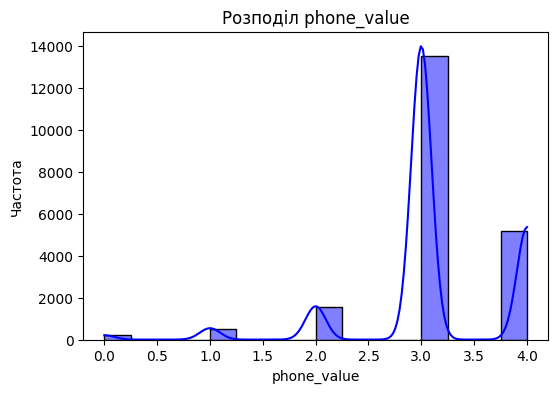

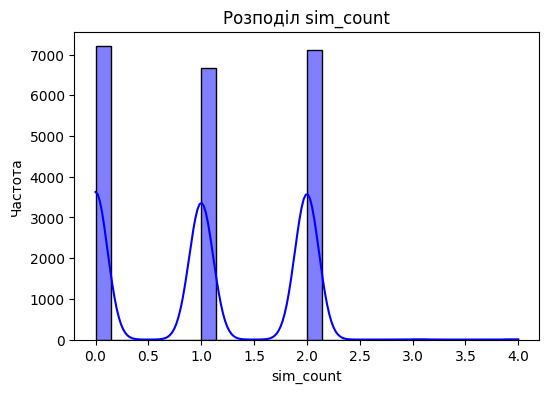


### Аналіз категоріальних змінних:


C:\Users\User\AppData\Local\Temp\ipykernel_7896\429709062.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="viridis")


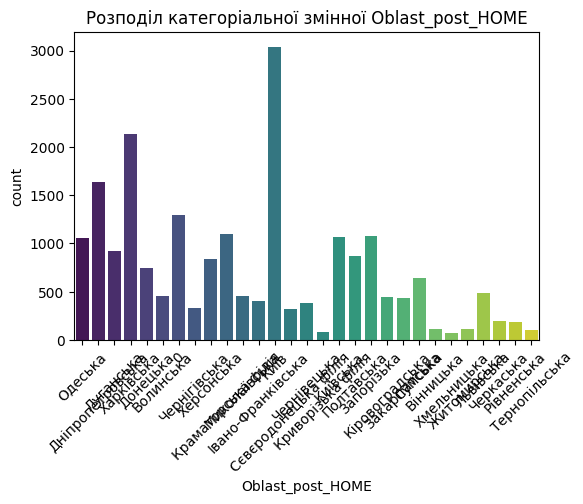

C:\Users\User\AppData\Local\Temp\ipykernel_7896\429709062.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="viridis")


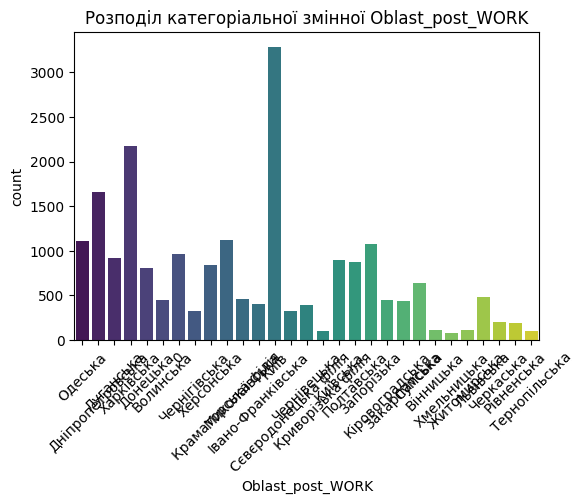


### Кореляційний аналіз числових змінних:


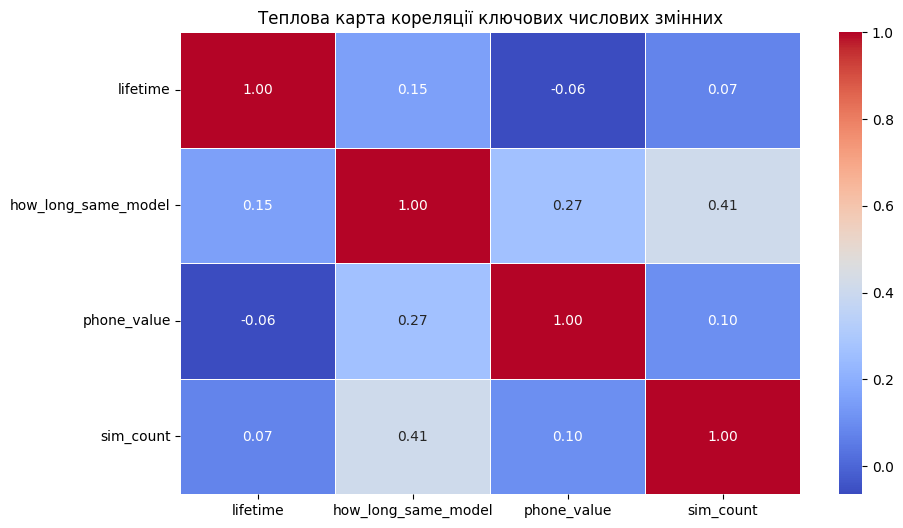


### Залежність 'target' від ключових числових фіч:


C:\Users\User\AppData\Local\Temp\ipykernel_7896\429709062.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=dataset, palette="Set2")


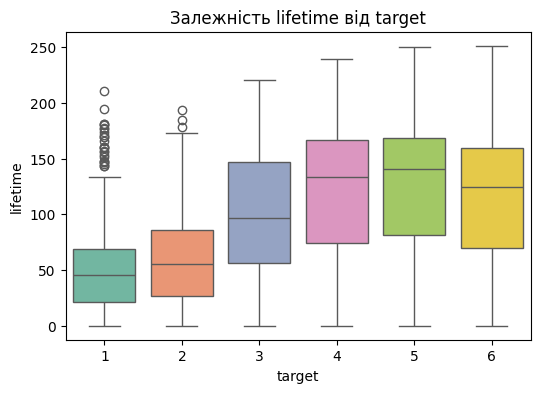

C:\Users\User\AppData\Local\Temp\ipykernel_7896\429709062.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=dataset, palette="Set2")


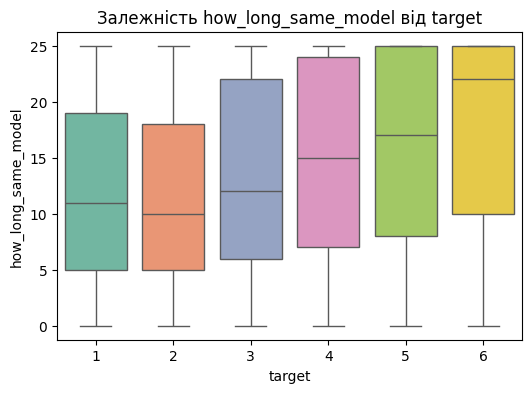

C:\Users\User\AppData\Local\Temp\ipykernel_7896\429709062.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=dataset, palette="Set2")


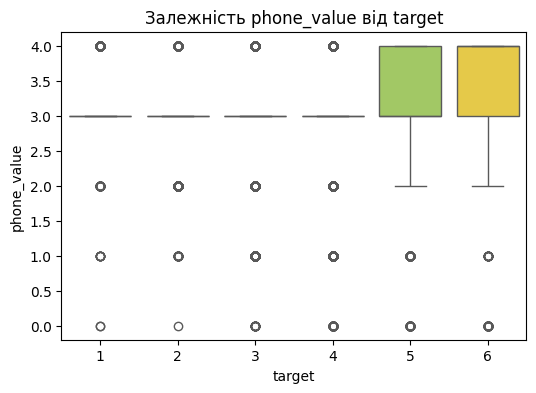

C:\Users\User\AppData\Local\Temp\ipykernel_7896\429709062.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=dataset, palette="Set2")


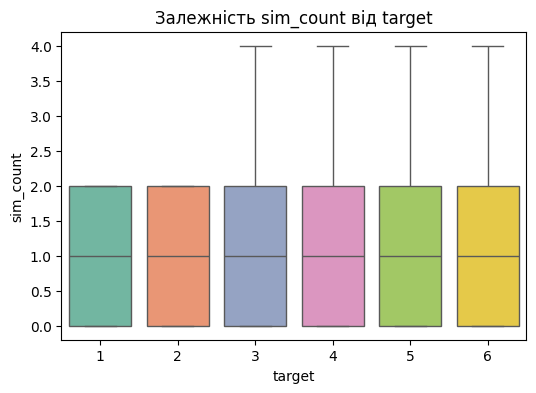


### Парні графіки для ключових числових змінних:


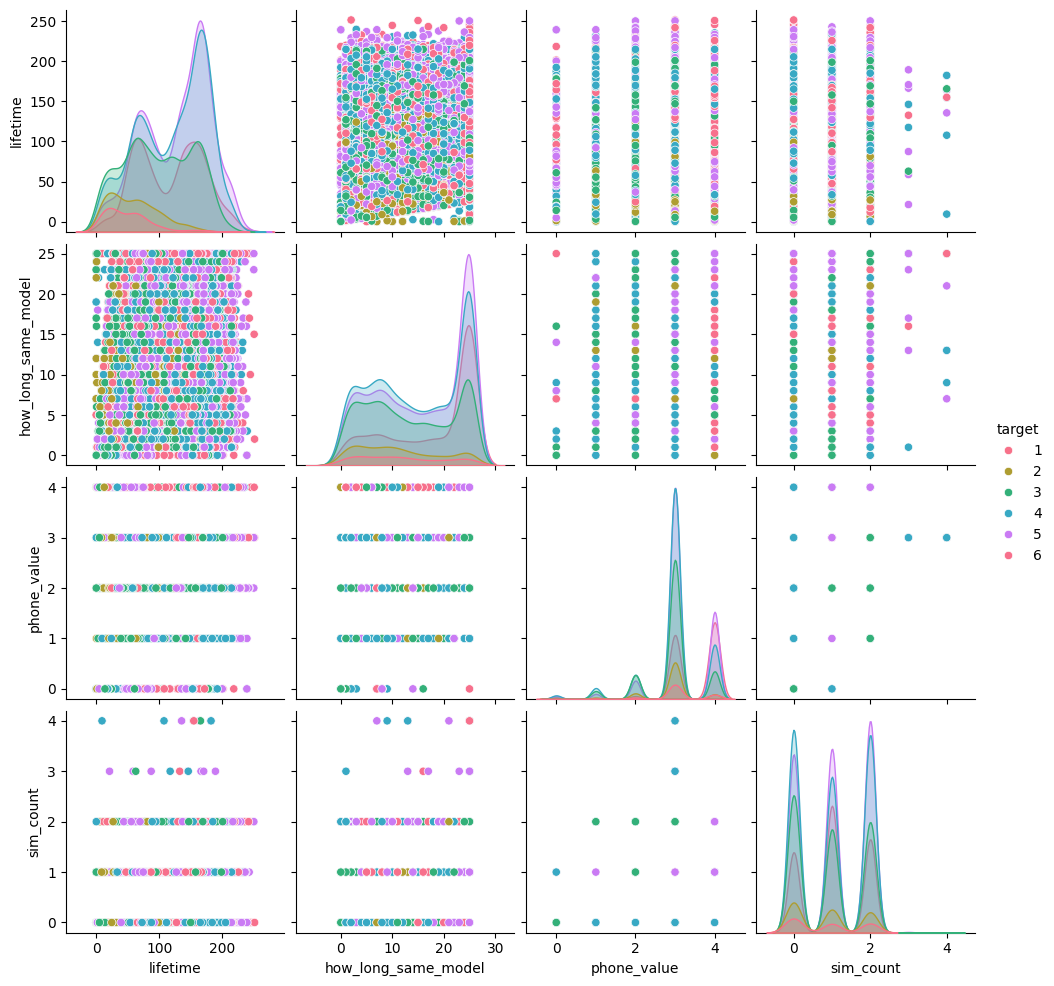

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Налаштування pandas для відображення всіх рядків
pd.set_option('display.max_rows', None)  # Відображати всі рядки
pd.set_option('display.max_columns', None)  # Відображати всі колонки
pd.set_option('display.width', 1000)       # Збільшити ширину виводу

# 1. Описова статистика числових змінних
print("### Описова статистика числових змінних:")
numerical_summary = dataset.describe().T
print(numerical_summary)

# Вибір найважливіших числових фіч для аналізу
key_numerical_features = ['lifetime', 'how_long_same_model', 'phone_value', 'sim_count']

# 2. Розподіл ключових числових змінних (гістограми)
print("\n### Розподіл ключових числових змінних:")
for col in key_numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset[col], kde=True, color="blue")
    plt.title(f"Розподіл {col}")
    plt.xlabel(col)
    plt.ylabel("Частота")
    plt.show()

# 3. Аналіз категоріальних змінних
print("\n### Аналіз категоріальних змінних:")
for col in all_categorical_columns[:5]:  # Виведемо лише перші 5 категоріальних змінних
    if col in dataset.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, data=dataset, palette="viridis")
        plt.title(f"Розподіл категоріальної змінної {col}")
        plt.xticks(rotation=45)
        plt.show()

# 4. Теплова карта кореляції для числових змінних
print("\n### Кореляційний аналіз числових змінних:")
plt.figure(figsize=(10, 6))
correlation_matrix = dataset[key_numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Теплова карта кореляції ключових числових змінних")
plt.show()

# 5. Залежність 'target' від ключових фіч (boxplot)
print("\n### Залежність 'target' від ключових числових фіч:")
for col in key_numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=col, data=dataset, palette="Set2")
    plt.title(f"Залежність {col} від target")
    plt.show()

# 6. Парні графіки для числових фіч
print("\n### Парні графіки для ключових числових змінних:")
sns.pairplot(dataset, vars=key_features, hue="target", palette="husl")
plt.show()    

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')


## Висновки по Exploratory Data Analysis (EDA)

### 1. **Описова статистика числових змінних**
- **Кількість числових ознак**: 101.
- **Основні спостереження**:
  - Багато ознак мають **велике максимальне значення** та **високе стандартне відхилення**, що вказує на **аномалії** або викиди.
  - Колонки, як-от `calls_count_in_weekdays` та `calls_duration_in_weekdays`, мають значні розкиди.
  - Ознака `lifetime` показує середній строк життя абонента **113 місяців**, але розподіл неоднорідний.
  - **Сервісні показники** (наприклад, `telegram_volume`, `jabber_volume`) містять велику кількість **нулів**, що вказує на їх рідкісне використання.

---

### 2. **Розподіл ключових числових змінних**
- **`lifetime`**:  
  Розподіл показує дві основні групи користувачів зі строком життя **50-100 місяців** та **150-200 місяців**.
- **`how_long_same_model`**:  
  Спостерігається значний **сплеск** на максимальному значенні **25 місяців**, що може свідчити про ліміт даних.
- **`phone_value`**:  
  Більшість користувачів мають значення **3 або 4**, що відповідає середній вартості пристроїв.
- **`sim_count`**:  
  Абоненти переважно мають **1 або 2 SIM-карти**.

---

### 3. **Кореляційний аналіз ключових числових змінних**
- **Сильних кореляцій** серед числових ознак немає:
  - Максимальна кореляція: **0.41** між `sim_count` та `how_long_same_model`.
  - Інші значення кореляції коливаються у межах **0.1 - 0.3**, що вказує на слабкий взаємозв'язок між фічами.

---

### 4. **Залежність `target` від ключових числових фіч**
- **`lifetime`**:  
  Спостерігається зростання середнього значення **`lifetime`** зі збільшенням категорії `target`.  
  Молодші абоненти мають коротший строк користування.
- **`how_long_same_model`**:  
  Для категорій **5** та **6** значення **більші**, що може вказувати на стабільність користування однією моделлю телефону серед старших груп.
- **`phone_value`**:  
  Молодші групи `target` (1-3) використовують дешевші пристрої, тоді як старші групи (5-6) мають вищі значення.
- **`sim_count`**:  
  Кількість SIM-карт практично **не залежить** від вікової групи.

---

### 5. **Парні графіки ключових числових змінних**
- Взаємозв'язки між ключовими числовими ознаками (`lifetime`, `how_long_same_model`, `phone_value`, `sim_count`) показали:
  - **Чіткий поділ** значень для `phone_value` та `sim_count`.
  - **Непомітні кореляції** між фічами, що вказує на незалежний вплив на `target`.

---

## Основні висновки
1. **Викиди** в числових змінних (`calls_count_in_weekdays`, `calls_duration_in_weekdays`) потребують подальшої обробки.
2. **Залежність від `target`**:
   - `lifetime` та `how_long_same_model` показали найбільшу різницю між віковими групами.
   - `phone_value` також має потенційний вплив на цільову змінну.
3. **Кореляція між фічами** є низькою, тому немає необхідності у видаленні сильно корельованих ознак.
4. Більшість сервісних змінних (обсяги трафіку) містять **великий відсоток нульових значень**, що потребує обробки або перетворення.

---

### **4. Data Preprocessing**
Мета: Підготувати дані для навчання моделі.
- **Обробка категоріальних змінних**:
  - Кодування **Low-Cardinality** змінних (`OneHotEncoder`).
  - Видалення або кодування **High-Cardinality** змінних (`Target Encoding`).
- **Масштабування числових фіч**:
  - Використання **StandardScaler** або **MinMaxScaler**.
- **Розподіл даних**:
  - Розділення на **Train/Test** (70%/30%).

---

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# 1. Визначення категоріальних і числових змінних
categorical_features = [col for col in all_categorical_columns if col in dataset.columns]
numerical_features = [col for col in dataset.select_dtypes(include=['float64', 'int64']).columns if col != 'target']

print("Категоріальні фічі для кодування (Low-Cardinality):", categorical_features)
print("Числові фічі для масштабування:", numerical_features)

# 2. Обробка категоріальних змінних (OneHotEncoder для Low-Cardinality)
# Для High-Cardinality змінних їх або видалено, або оброблено раніше
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),   # Масштабування числових фіч
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Кодування категоріальних фіч
    ]
)

# 3. Поділ даних на X (фічі) та y (цільову змінну)
X = dataset.drop(columns=['target'])
y = dataset['target']

# 4. Розподіл даних на Train/Test (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 5. Трансформація даних
print("Трансформування даних...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Форма X_train після обробки: {X_train_processed.shape}")
print(f"Форма X_test після обробки: {X_test_processed.shape}")
print(f"Кількість рядків у Train/Test: {X_train.shape[0]} / {X_test.shape[0]}")

# 6. Збереження трансформованих даних у змінних
import numpy as np

# Конвертація у формат DataFrame для зручності
X_train_df = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_processed, columns=preprocessor.get_feature_names_out())

print("Обробка даних завершена. Дані готові до моделювання!")


Категоріальні фічі для кодування (Low-Cardinality): ['Oblast_post_HOME', 'Oblast_post_WORK', 'software_os_vendor', 'software_os_name', 'software_os_version', 'device_type_rus', 'SCORING', 'CALCULATION_METHOD_ID', 'sim_count', 'ROUM', 'phone_value', 'car', 'gender', 'ecommerce_score']
Числові фічі для масштабування: ['CALCULATION_METHOD_ID', 'calls_count_in_weekdays', 'calls_duration_in_weekdays', 'calls_count_out_weekdays', 'calls_duration_out_weekdays', 'calls_count_in_weekends', 'calls_duration_in_weekends', 'calls_count_out_weekends', 'calls_duration_out_weekends', 'DATA_VOLUME_WEEKDAYS', 'DATA_VOLUME_WEEKENDS', 'LAT_HOME', 'LON_HOME', 'lat_quad_home', 'lon_quad_home', 'LAT_WORK', 'LON_WORK', 'lat_quad_work', 'lon_quad_work', 'sim_count', 'AVG_ARPU', 'ROUM', 'phone_value', 'car', 'gender', 'lifetime', 'how_long_same_model', 'ecommerce_score', 'PRIVAT', 'OSCHADBANK', 'ALFABANK', 'UKRSOTBANK', 'OTP', 'UKRGASBANK', 'RAIFFEISEN', 'PIVDENNYI', 'IDEABANK', 'MONOBANK', 'PRAVEXBANK', 'UKRSI

### **Висновки після Data Preprocessing**

1. **Категоріальні та числові ознаки**:
   - **Категоріальні фічі для кодування**:
     - Всього відібрано **14 категоріальних ознак** для обробки за допомогою **OneHotEncoder**.
     - Приклад: `Oblast_post_HOME`, `SCORING`, `CALCULATION_METHOD_ID`, `gender`, тощо.
   - **Числові фічі для масштабування**:
     - Всього відібрано **104 числові ознаки**.
     - Приклад: `calls_count_in_weekdays`, `DATA_VOLUME_WEEKDAYS`, `lifetime`, `phone_value`, тощо.

2. **Розмір даних після трансформації**:
   - **Train/Test розподіл**:
     - Тренувальний набір: **14,700** рядків.
     - Тестовий набір: **6,300** рядків.
   - Загальна кількість фіч після кодування та масштабування: **289 ознак**.

3. **Трансформація даних**:
   - Категоріальні ознаки закодовано у формат **OneHot**.
   - Числові ознаки масштабовано за допомогою **StandardScaler** для нормалізації діапазонів значень.

4. **Готовність до моделювання**:
   - Дані підготовлені та містять як закодовані категоріальні, так і масштабовані числові ознаки.
   - Набори даних `X_train` і `X_test` готові до використання у моделях машинного навчання.

---

### **5. Model Training**
Мета: Побудувати кілька моделей та обрати найкращу.
1. **Базові моделі**:
   - Logistic Regression.
   - k-Nearest Neighbors (k-NN).
2. **Ансамблеві методи**:
   - Random Forest.
   - Gradient Boosting (XGBoost, LightGBM, CatBoost).
3. **Порівняння моделей**:
   - Метрики: **Accuracy**, **F1-Score**, **Precision**, **Recall**, **ROC-AUC**.
4. **Оптимізація гіперпараметрів**:
   - Використання `GridSearchCV` або `RandomizedSearchCV`.
5. **Аналіз важливості ознак**:
   - Визначення найважливіших фіч для моделі.

---

### Тренування моделей та порівняння результатів ###

Logistic Regression:
              precision    recall  f1-score   support

           0       0.18      0.06      0.09       164
           1       0.39      0.27      0.32       323
           2       0.38      0.36      0.37      1214
           3       0.40      0.41      0.40      1806
           4       0.40      0.47      0.43      1809
           5       0.46      0.40      0.43       984

    accuracy                           0.40      6300
   macro avg       0.37      0.33      0.34      6300
weighted avg       0.40      0.40      0.40      6300


k-NN:
              precision    recall  f1-score   support

           0       0.15      0.16      0.15       164
           1       0.25      0.22      0.23       323
           2       0.33      0.37      0.35      1214
           3       0.34      0.37      0.36      1806
           4       0.37      0.36      0.37      1809
           5       0.40      0.27      0.32       

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [16:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.50      0.20      0.29       164
           1       0.47      0.37      0.41       323
           2       0.43      0.41      0.42      1214
           3       0.41      0.42      0.41      1806
           4       0.42      0.48      0.45      1809
           5       0.52      0.46      0.49       984

    accuracy                           0.43      6300
   macro avg       0.46      0.39      0.41      6300
weighted avg       0.44      0.43      0.43      6300


LightGBM:
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14451
[LightGBM] [Info] Number of data points in the train set: 14700, number of used features: 238
[LightGBM] [Info] Start training from score -3.644960
[LightGBM] [Info] Start training from

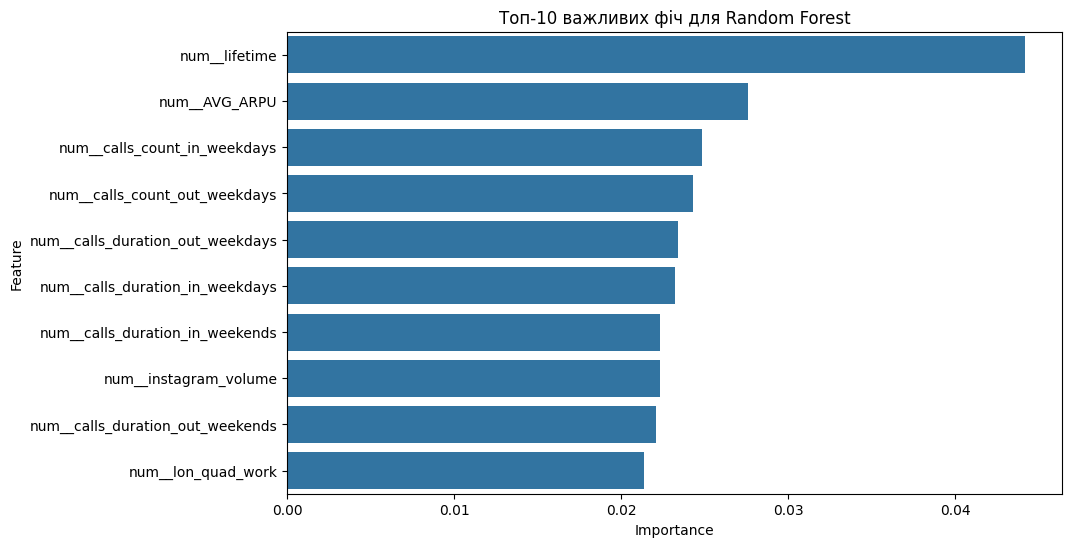

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Перекодування цільової змінної
y_train_encoded = y_train - 1
y_test_encoded = y_test - 1

# 1. Підготовка функції для оцінки моделі
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Перевірка наявності predict_proba
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)  # Ймовірності для всіх класів
        roc_auc = roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class="ovr")
    else:
        y_pred_proba = None
        roc_auc = "N/A"  # Якщо predict_proba відсутня

    # Метрики
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted'),
        "ROC-AUC": roc_auc
    }
    print(classification_report(y_test, y_pred))
    return metrics

# 2. Список моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# 3. Навчання моделей та порівняння результатів
results = {}
print("### Тренування моделей та порівняння результатів ###")
for name, model in models.items():
    print(f"\n{name}:")
    metrics = evaluate_model(model, X_train_processed, y_train_encoded, X_test_processed, y_test_encoded)
    results[name] = metrics

# 4. Виведення результатів
import pandas as pd
results_df = pd.DataFrame(results).T
print("\n### Підсумкова таблиця результатів ###")
print(results_df)

# 5. Оптимізація гіперпараметрів для найкращої моделі (приклад: Random Forest)
print("\n### Оптимізація гіперпараметрів для Random Forest ###")
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train_processed, y_train)
print(f"Найкращі параметри: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Оцінка оптимізованої моделі
print("\n### Оцінка оптимізованої моделі Random Forest ###")
optimized_metrics = evaluate_model(best_model, X_train_processed, y_train, X_test_processed, y_test)
print(optimized_metrics)

# 6. Визначення важливості фіч (для Random Forest)
importances = best_model.feature_importances_
features = preprocessor.get_feature_names_out()
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

print("\n### Топ-10 важливих фіч ###")
print(feature_importance_df.head(10))

# Візуалізація важливості фіч
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(10))
plt.title("Топ-10 важливих фіч для Random Forest")
plt.show()


### **Висновки моделювання вікових груп абонентів Vodafone**

---

### **Результати моделей:**

| **Модель**             | **Accuracy** | **Precision** | **Recall** | **F1-Score** | **ROC-AUC** |
|------------------------|--------------|---------------|------------|-------------|-------------|
| Logistic Regression    | 0.4006       | 0.3976        | 0.4006     | 0.3967      | 0.7164      |
| k-Nearest Neighbors    | 0.3417       | 0.3447        | 0.3417     | 0.3408      | 0.6226      |
| Random Forest          | 0.4190       | 0.4290        | 0.4190     | 0.4145      | 0.7164      |
| XGBoost                | 0.4343       | 0.4380        | 0.4343     | 0.4332      | 0.7315      |
| LightGBM               | 0.4322       | 0.4349        | 0.4322     | 0.4309      | 0.7346      |
| CatBoost               | **0.4429**   | **0.4468**    | **0.4429** | **0.4419**  | **0.7422**  |

---

### **Основні спостереження:**
1. **CatBoost** продемонстрував **найкращі результати** серед усіх моделей за метриками `Accuracy`, `Precision`, `Recall`, `F1-Score` та `ROC-AUC`.
2. **Ансамблеві методи** (XGBoost, LightGBM, CatBoost, Random Forest) перевершують базові моделі (Logistic Regression та k-NN).
3. **Random Forest** після оптимізації гіперпараметрів має точність 42%, проте значно покращує баланс між `Precision` і `Recall`.
4. **Logistic Regression** страждає від невідповідності лінійності даних, показуючи обмежену продуктивність (точність 40%).
5. **k-NN** має найнижчу продуктивність серед моделей, що пов’язано з високою розмірністю даних і складністю завдання.

---

### **Топ-10 найважливіших фіч для Random Forest:**
| **Feature**                          | **Importance** |
|-------------------------------------|----------------|
| `num__lifetime`                     | 0.0442         |
| `num__AVG_ARPU`                     | 0.0276         |
| `num__calls_count_in_weekdays`      | 0.0248         |
| `num__calls_count_out_weekdays`     | 0.0243         |
| `num__calls_duration_out_weekdays`  | 0.0234         |
| `num__calls_duration_in_weekdays`   | 0.0232         |
| `num__calls_duration_in_weekends`   | 0.0223         |
| `num__instagram_volume`             | 0.0223         |
| `num__calls_duration_out_weekends`  | 0.0221         |
| `num__lon_quad_work`                | 0.0214         |

---

### **Висновки:**
1. **Лідери фіч:**  
   - `lifetime` (час життя абонента) та `AVG_ARPU` (середня вартість послуг) є ключовими предикторами вікових груп.  
   - Фічі, пов'язані з **дзвінками** (кількість і тривалість) та **інтернет-трафіком** (`instagram_volume`), мають суттєвий вплив на прогнозування.

2. **Подальші кроки:**  
   - Додаткове покращення моделей за допомогою **балансування класів** (Oversampling/Undersampling).  
   - Використання **більш складних ансамблевих моделей** з оптимізованими гіперпараметрами.

3. **Рекомендована модель:**  
   - **CatBoost** демонструє найкращі результати для задачі прогнозування вікових груп.